In [9]:
import pyaudio
import wave
import numpy as np
import matplotlib.pyplot as plt
CHUNK = 2048
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 3

Recording
Done recording


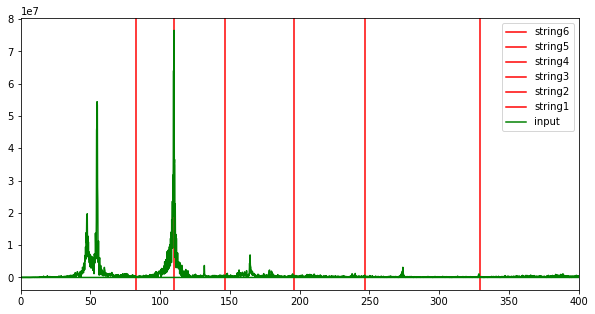

In [41]:
p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    stream_data = stream.read(CHUNK)
    data = np.frombuffer(stream_data, dtype=np.int16).astype(np.float32)
    frames.extend(data)

print("Done recording")

stream.stop_stream()
stream.close()
p.terminate()
E4=329.63
B3=246.94
G3=196.00
D3=146.83
A2=110.00
E2=82.41
stringFreq=[E4, B3, G3, D3, A2, E2]

plt.figure(figsize=(10,5))
F=np.fft.fft(frames)
freq = np.fft.fftfreq(len(frames), d=1/RATE)

for i in range(len(stringFreq)):
    plt.axvline(x=stringFreq[i], label='string%d' %(6-i), color='r')
plt.plot(freq, abs(F), label='input', color='g')
plt.xlim([0, 400])
plt.legend()
plt.xlabel='frequency(Hz)'
plt.show()